In [3]:
from huggingface_hub import hf_hub_download

model_id = 'TheBloke/Mistral-7B-Instruct-v0.2-GGUF'
filename = 'mistral-7b-instruct-v0.2.Q2_K.gguf'

downloaded_model_path = hf_hub_download(repo_id = model_id, filename = filename)

In [4]:
from llama_cpp import Llama
import time


prompt = "Q: Name all the planets in the solar system A:"
results = []


for i in range(9,16):
    start_time = time.time()
    for j in range(6,12):
        n_ctx = int(2**i)
        max_tokens = int(2**j)
        llm = Llama(
            model_path=downloaded_model_path,
            n_ctx = n_ctx,
            verbose=False
        )
        output = llm(
            prompt,
            max_tokens=max_tokens,
            stop=["Q:"],
            echo=True
        )
        end_time = time.time()
        response_text = output['choices'][0]['text']
        result = {
            'n_ctx':n_ctx,
            'max_tokens':max_tokens,
            'prompt': "Q: Name all the planets in the solar system A:",
            'response': output,
            'response_text': response_text,
            'time': end_time-start_time,
            'host': 'desktop',
            'model_id': model_id,
            'filename': filename
                }
        print('===')
        print(f'params: n_ctx:{n_ctx}, max_tokens: {max_tokens} ')
        print(f'time: {end_time-start_time}s\n')
        print(f'{response_text}\n')
        
        results.append(result)

===
params: n_ctx:512, max_tokens: 64 
time: 7.8060688972473145s

Q: Name all the planets in the solar system A: Here are the eight planets in our solar system, listed in order from the sun:

1. Mercury: The smallest planet and closest to the sun.
2. Venus: The second planet from the sun, known for its thick atmosphere and extreme temperature fluctuations.
3. Earth: Our home planet

===
params: n_ctx:512, max_tokens: 128 
time: 22.62487006187439s

Q: Name all the planets in the solar system A: Here are the eight planets in our solar system, listed in order from the sun:

1. Mercury: The smallest planet and closest to the sun.
2. Venus: The second planet from the sun, known for its thick atmosphere and extreme temperature fluctuations.
3. Earth: Our home planet, with liquid water on its surface and a stable climate.
4. Mars: The fourth planet from the sun, known as the "Red Planet" due to its reddish appearance from iron oxide (rust).
5. Jupiter: The fifth planet from the sun and the la

In [6]:
from datetime import datetime

current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")
print(formatted_datetime)

for result in results:
    result['time_created'] = formatted_datetime

2024-10-19 18:41:01


In [27]:
for result in results:
    result['gpu'] = False

In [8]:
import pandas as pd

df = pd.DataFrame(results)
df.columns

Index(['n_ctx', 'max_tokens', 'prompt', 'response', 'response_text', 'time',
       'host', 'model_id', 'filename', 'time_created'],
      dtype='object')

In [28]:
df.to_csv('test_logs.csv')

In [20]:
df_heat = df[['n_ctx','max_tokens','time','response_text']]

In [24]:
planets = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
def contains_all_strings(text, strings):
    return all(s.lower() in text.lower() for s in strings)

df_heat['success'] = df_heat['response_text'].apply(lambda x: contains_all_strings(x, planets))

C:\Users\crossfire234\AppData\Local\Temp\ipykernel_41072\1683242040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heat['success'] = df_heat['response_text'].apply(lambda x: contains_all_strings(x, planets))


In [10]:
df_heat.sample(5)

,n_ctx,max_tokens,time
4,512,1024,91.693417
36,32768,64,8.739010
17,2048,2048,114.928538
29,8192,2048,118.762140
0,512,64,7.806069


In [17]:
df_pivot = df_heat.pivot(index='max_tokens', columns='n_ctx', values='time')

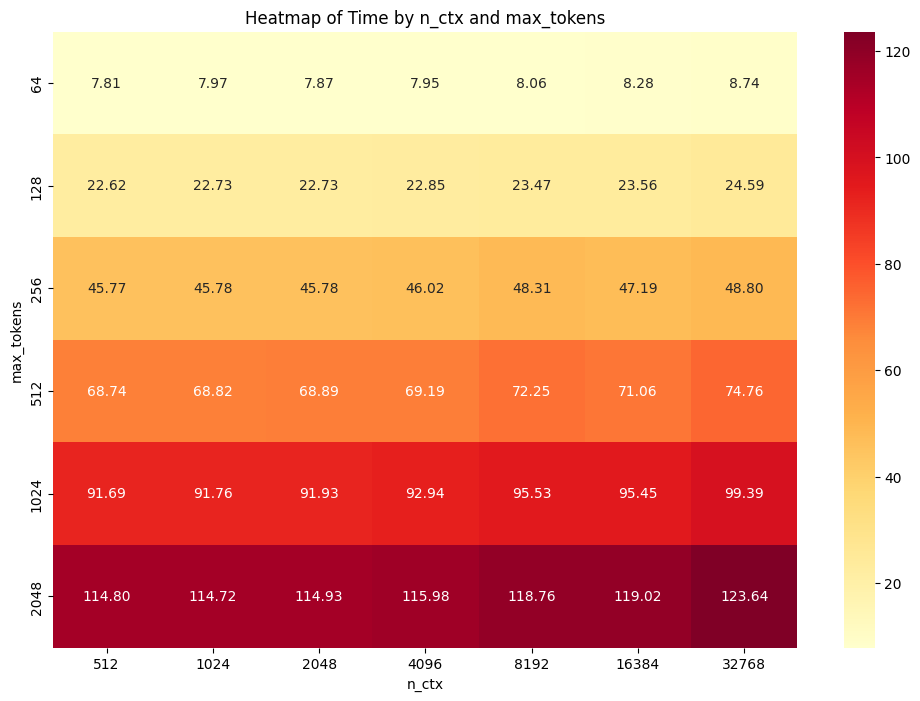

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt='.2f', cmap='YlOrRd')

plt.title('Heatmap of Time by n_ctx and max_tokens')
plt.xlabel('n_ctx')
plt.ylabel('max_tokens')

plt.show()

In [26]:
df_heat

,n_ctx,max_tokens,time,response_text,success
0,512,64,7.806069,Q: Name all the planets in the solar system A:...,False
1,512,128,22.624870,Q: Name all the planets in the solar system A:...,False
2,512,256,45.773870,Q: Name all the planets in the solar system A:...,True
3,512,512,68.737178,Q: Name all the planets in the solar system A:...,True
4,512,1024,91.693417,Q: Name all the planets in the solar system A:...,True
5,512,2048,114.798032,Q: Name all the planets in the solar system A:...,True
6,1024,64,7.973039,Q: Name all the planets in the solar system A:...,False
7,1024,128,22.731648,Q: Name all the planets in the solar system A:...,False
8,1024,256,45.781798,Q: Name all the planets in the solar system A:...,True
9,1024,512,68.819623,Q: Name all the planets in the solar system A:...,True
